In [1]:
# load the packages we need
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
import pydot
import graphviz 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import metrics 
from keras.utils.vis_utils import plot_model

In [2]:
data_name = "dataCell"
processed_df = pd.read_csv("./Data/Processed_"+data_name+".csv") # load pre-processed data

In [3]:
processed_df['reviews'] = processed_df['reviews'].astype(str)
vocab_size = 10000# word size for tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(processed_df['reviews'])# tokenize
X_train = pad_sequences(tokenizer.texts_to_sequences(processed_df['reviews']))# padding
y_train = processed_df['sentiments']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0, shuffle=True)

In [4]:
tf.random.set_seed(0)# set random seed
D = 16# embedding state dimension
M = 32# hidden state dimension
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, D))
model.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(M)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 173,601
Trainable params: 173,601
Non-trainable params: 0
_________________________________________________________________


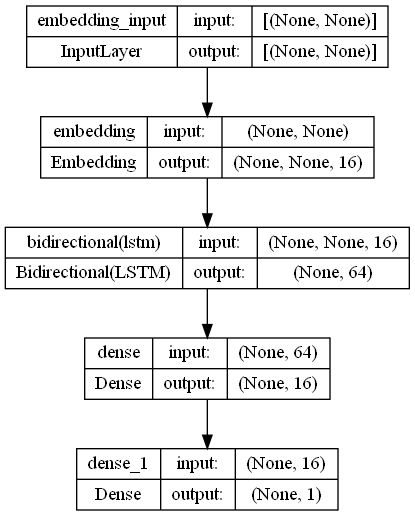

In [5]:
plot_model(model,show_shapes=True, show_layer_names=True)# plot the model

In [6]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
# define early_stopping
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.05,patience=10)

In [8]:
# train the model
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=512,
                    validation_split=0.2,
                    callbacks = [early_stopping],
                    verbose=1)

Epoch 1/100
5/5 [==============================] - 57s 11s/step - loss: 0.6707 - accuracy: 0.7132 - val_loss: 0.6070 - val_accuracy: 0.8899
Epoch 2/100
5/5 [==============================] - 68s 13s/step - loss: 0.5395 - accuracy: 0.8689 - val_loss: 0.3459 - val_accuracy: 0.8899
Epoch 3/100
5/5 [==============================] - 66s 13s/step - loss: 0.3872 - accuracy: 0.8689 - val_loss: 0.3451 - val_accuracy: 0.8899
Epoch 4/100
5/5 [==============================] - 65s 12s/step - loss: 0.3852 - accuracy: 0.8689 - val_loss: 0.3539 - val_accuracy: 0.8899
Epoch 5/100
5/5 [==============================] - 74s 14s/step - loss: 0.3820 - accuracy: 0.8689 - val_loss: 0.3448 - val_accuracy: 0.8899
Epoch 6/100
5/5 [==============================] - 74s 14s/step - loss: 0.3827 - accuracy: 0.8689 - val_loss: 0.3608 - val_accuracy: 0.8899
Epoch 7/100
5/5 [==============================] - 73s 14s/step - loss: 0.3719 - accuracy: 0.8689 - val_loss: 0.3623 - val_accuracy: 0.8899
Epoch 8/100
5/5 [===

In [9]:
# get test accuracy
results = model.evaluate(X_test,  y_test, verbose=2)

21/21 - 2s - loss: 0.3132 - accuracy: 0.8942 - 2s/epoch - 89ms/step


In [10]:
history_dict = history.history# Get training history

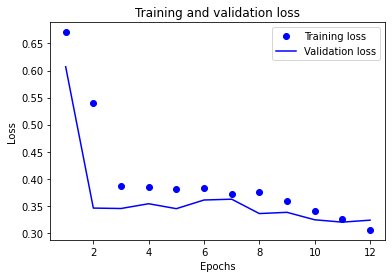

In [11]:
# plot the loss
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

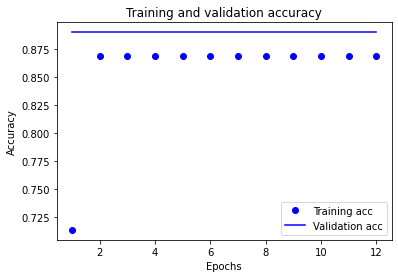

In [12]:
# plot the accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()